In [1]:
!pip install catboost xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df = df.replace("?", np.nan)
df = df.dropna()

target = "income"

X = df.drop(columns=[target])
y = df[target]

label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

y = LabelEncoder().fit_transform(y)

X.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)
precision_tree = precision_score(y_test, pred_tree, pos_label=1)
precision_tree


0.6208277703604806

In [7]:
model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
precision_rf = precision_score(y_test, pred_rf, pos_label=1)
precision_rf


0.7691693290734825

In [8]:
model_ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)
model_ada.fit(X_train, y_train)
pred_ada = model_ada.predict(X_test)
precision_ada = precision_score(y_test, pred_ada, pos_label=1)
precision_ada


0.799249530956848

In [9]:
model_cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    verbose=0,
    random_seed=42
)

model_cat.fit(X_train, y_train)
pred_cat = model_cat.predict(X_test)
precision_cat = precision_score(y_test, pred_cat, pos_label=1)
precision_cat


0.8073836276083467

In [10]:
model_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="binary:logistic",
    eval_metric="logloss"
)

model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
precision_xgb = precision_score(y_test, pred_xgb, pos_label=1)
precision_xgb


0.7931570762052877

In [15]:
metrics = {
    "Decision Tree": {
        "precision": precision_score(y_test, pred_tree, pos_label=1),
        "recall": recall_score(y_test, pred_tree, pos_label=1),
        "f1": f1_score(y_test, pred_tree, pos_label=1),
    },
    "Random Forest": {
        "precision": precision_score(y_test, pred_rf, pos_label=1),
        "recall": recall_score(y_test, pred_rf, pos_label=1),
        "f1": f1_score(y_test, pred_rf, pos_label=1),
    },
    "AdaBoost": {
        "precision": precision_score(y_test, pred_ada, pos_label=1),
        "recall": recall_score(y_test, pred_ada, pos_label=1),
        "f1": f1_score(y_test, pred_ada, pos_label=1),
    },
    "CatBoost": {
        "precision": precision_score(y_test, pred_cat, pos_label=1),
        "recall": recall_score(y_test, pred_cat, pos_label=1),
        "f1": f1_score(y_test, pred_cat, pos_label=1),
    },
    "XGBoost": {
        "precision": precision_score(y_test, pred_xgb, pos_label=1),
        "recall": recall_score(y_test, pred_xgb, pos_label=1),
        "f1": f1_score(y_test, pred_xgb, pos_label=1),
    }
}

metrics_df = pd.DataFrame(metrics).T
metrics_df


,precision,recall,f1
Decision Tree,0.620828,0.619174,0.620000
Random Forest,0.769169,0.641145,0.699346
AdaBoost,0.799250,0.567244,0.663551
CatBoost,0.807384,0.669774,0.732169
XGBoost,0.793157,0.679095,0.731707


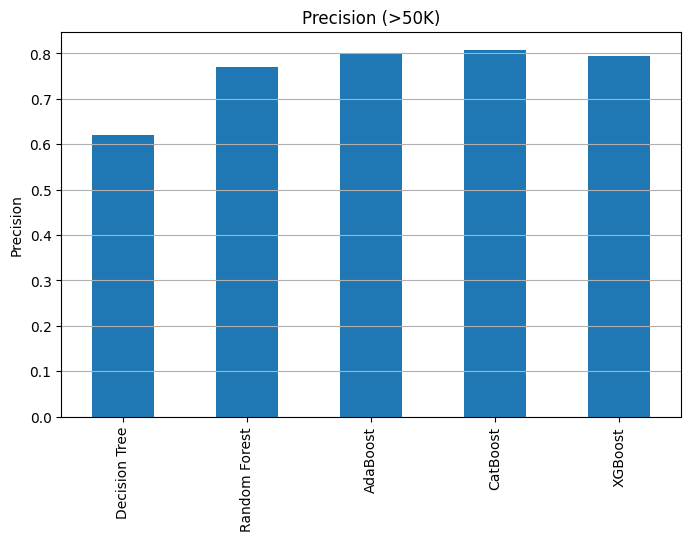

In [16]:
plt.figure(figsize=(8,5))
metrics_df["precision"].plot(kind="bar")
plt.title("Precision (>50K)")
plt.ylabel("Precision")
plt.grid(axis="y")
plt.show()


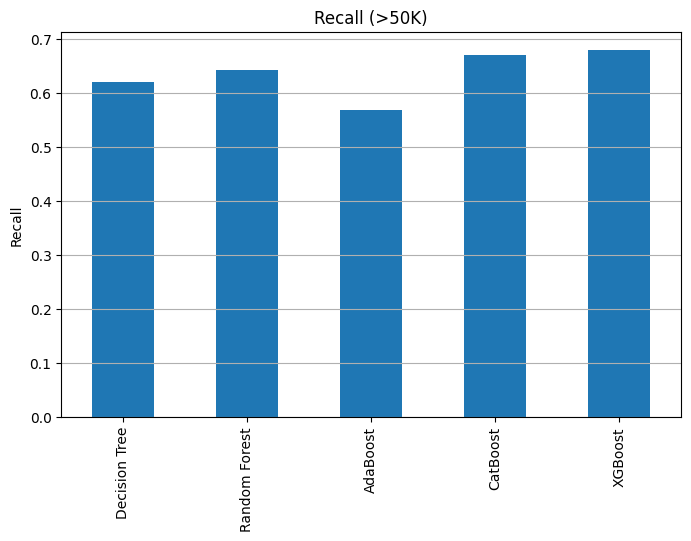

In [17]:
plt.figure(figsize=(8,5))
metrics_df["recall"].plot(kind="bar")
plt.title("Recall (>50K)")
plt.ylabel("Recall")
plt.grid(axis="y")
plt.show()


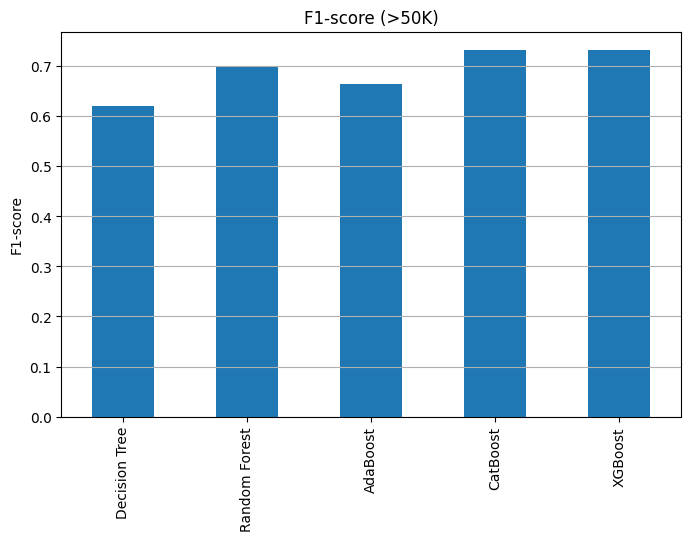

In [18]:
plt.figure(figsize=(8,5))
metrics_df["f1"].plot(kind="bar")
plt.title("F1-score (>50K)")
plt.ylabel("F1-score")
plt.grid(axis="y")
plt.show()
